In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm

# Лаборатоная работа № 5.1.2
## Исследование эффекта Комптона
#### Работу выполнили студенты 772 группы:
- Усеинов Булат
- Зубков Максим
- Шевцов Владимир

## Часть I. 
### Экспериментальная установка

In [2]:
#TODO

## Часть II. 
### Обработка экспериментальных данных

In [3]:
data = pd.DataFrame()
data['Thetta'] = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
data['X'] = 1 - np.cos(np.deg2rad(data['Thetta']))
data['N_min'] = [805, 775, 705, 655, 595, 500, 445, 380, 350, 320, 300, 279, 260]
data['N_max'] = [815, 785, 720, 665, 605, 540, 475, 420, 375, 350, 315, 295, 275]
data['N'] = (data['N_min'] + data['N_max']) / 2.
data['1/N'] = 1 / data['N']
data['sigma_N'] = (data['N_max'] - data['N_min']) / 2.
data['weight'] = 1 / data['sigma_N']

In [4]:
data

,Thetta,X,N_min,N_max,N,1/N,sigma_N,weight
0,0,0.000000,805,815,810.0,0.001235,5.0,0.200000
1,10,0.015192,775,785,780.0,0.001282,5.0,0.200000
2,20,0.060307,705,720,712.5,0.001404,7.5,0.133333
3,30,0.133975,655,665,660.0,0.001515,5.0,0.200000
4,40,0.233956,595,605,600.0,0.001667,5.0,0.200000
5,50,0.357212,500,540,520.0,0.001923,20.0,0.050000
6,60,0.500000,445,475,460.0,0.002174,15.0,0.066667
7,70,0.657980,380,420,400.0,0.002500,20.0,0.050000
8,80,0.826352,350,375,362.5,0.002759,12.5,0.080000
9,90,1.000000,320,350,335.0,0.002985,15.0,0.066667


### Для того, чтобы провести лучшую прямую воспользуемся методом минимизации $\chi^2$, его также называют взвешенным методом наименьших квадратов (Weighted Least Squares - WLS). 

In [5]:
X = sm.add_constant(data['X'])
wls_model = sm.WLS(data['1/N'], X, weights=data['weight'])
results = wls_model.fit()

/Users/bulat/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Получим параметры полинома вида: $$y = \mathbf{X} \cdot x + \mathbf{const}$$ 
- $\mathbf{X} $ - наклон прямой.
- $\mathbf{const}$ - сдвиг прямой.

In [6]:
results.params

const    0.001282
X        0.001670
dtype: float64

### Данная реализация WLS дает возможность получить ошибки коэффициентов и другую информацию о том, насколько хорошо была проведена прямая.

In [7]:
results.summary()

/Users/bulat/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    1/N   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4808.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.97e-16
Time:                        03:52:08   Log-Likelihood:                 111.49
No. Observations:                  13   AIC:                            -219.0
Df Residuals:                      11   BIC:                            -217.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013   1.78e-05     72.227      0.000       0.001       0.001
X              0.0017   2.41e-05     69.340      0.000       0.002       0.002
==============================================================================
Omnibus:                        0.470   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.514
Skew:                           0.021   Prob(JB):                        0.773
Kurtosis:                       2.027   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Из этого отчета видим следующие погрешности:
- $\delta \mathbf{X} = 2.41 \cdot 10^{-5}$
- $\delta \mathbf{const} = 1.78 \cdot 10^{-5}$

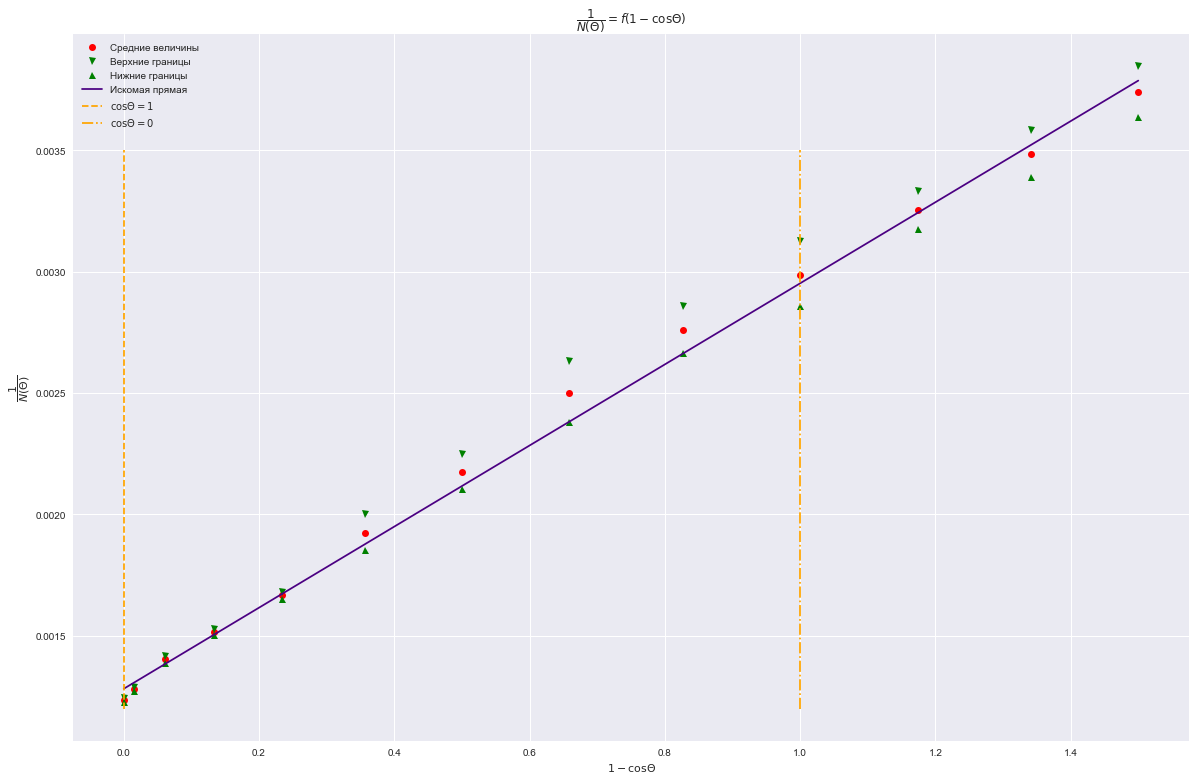

In [8]:
mpl.style.use('seaborn')
plt.figure(figsize=(20,13))
plt.title(r"$\dfrac{1}{N(\Theta)} = f(1-\cos \Theta)$")
plt.xlabel(r'$1-\cos \Theta$')
plt.ylabel(r'$\dfrac{1}{N(\Theta)}$')
plt.plot(data['X'], data['1/N'], 'o', label='Средние величины', color='red' )
plt.plot(data['X'], 1/data['N_min'], 'v', label='Верхние границы', color='green')
plt.plot(data['X'], 1/data['N_max'], '^', label='Нижние границы', color='green')
plt.plot(data['X'], 0.001670*data['X'] + 0.001282, label = 'Искомая прямая', color='indigo' )
plt.plot([0,0], [0.0012, 0.0035], '--', label = r'$\cos \Theta = 1$', color='orange')
plt.plot([1, 1], [0.0012, 0.0035], '-.', label = r'$\cos \Theta = 0$', color='orange' )
plt.legend()

### Найдем точку обратную величину к ординате точки пересечения построенного графика и оси ординат, для того, чтобы определить занчение $N(0)$

In [9]:
x = 0
N_0 = 1 / (0.001670*x + 0.001282)
print(f'N_0 = {N_0}')
delta_N_0 = (2.41e-05*x + 1.78e-05) / (0.001670*x + 0.001282) * (1 / (0.001670*x + 0.001282))
print(f'delta N_0 = {delta_N_0}\n\n')
print(f'N(0) = {round(N_0, 3)} ± {round(delta_N_0, 3)}')

N_0 = 780.0312012480499
delta N_0 = 10.830386413584469


N(0) = 780.031 ± 10.83


### Найдем точку обратную величину к ординате точки пересечения построенного графика и прямой $\cos \Theta = 0$, для того, чтобы определить занчение $N(90)$

In [10]:
x = 1
N_90 = 1/ (0.001670*x + 0.001282)
print(f'N_90 = {N_90}')
delta_N_90 = (2.41e-05*x + 1.78e-05) / (0.001670*x + 0.001282) * (1 / (0.001670*x + 0.001282))
print(f'delta N_90 = {delta_N_90}\n\n')
print(f'N(90) = {round(N_90, 3)} ± {round(delta_N_90, 3)}')

N_90 = 338.75338753387535
delta N_90 = 4.808186632001822


N(90) = 338.753 ± 4.808


### По формуле $$mc^2 = E_{\gamma}\dfrac{N(90)}{N(0) - N(90)}$$
где $E_{\gamma} = 662 \text{ кэВ}$
### рассчитаем экспериментальную энергию покоя частицы, на которой происходит комптоновское рассеяние первичных $\gamma-$квантов.

In [11]:
mc2 = 662 * N_90 / (N_0 - N_90)
print(f"mc^2 = {mc2}")
delta_mc2 = (((delta_N_0 + delta_N_90) / (N_0 - N_90)) + (delta_N_90 / N_90)) * (N_90 / (N_0 - N_90)) * 662
print(f"delta mc^2 = {delta_mc2}\n\n")
print(f'mc^2 = {round(mc2, 3)} ± {round(delta_mc2, 3)}')

mc^2 = 508.19401197604793
delta mc^2 = 25.223223062856327


mc^2 = 508.194 ± 25.223


### Так как в теории $mc^2 = 511 \text{ кэВ}$ и на практике мы получили $mc^2 = 508.194 \pm 25.223 \text{ кэВ}$, то можно сделать вывод, что эксперимент вполне соотносится с теорией.